### How does an estuary microbial community responds to disturbances and what environmental factors drive the response?

In [1]:
from scripts/utils import *
%matplotlib inline

## Methods
Data formatted + cleaned for 2014-2021 (2022 to come)
- Ran through the pipeline splitting 16S/18S
> Focus on bacteria/archaea and chloroplast
- We have 5 depths
> Vertical connectivity

#### What are the observable physical/chemical disturbances based off metadata, and define their scale.
Environmental metadata

**I think we should focus on 1 or 2 disturbances first: the most frequent or impactful events**

Known list of events:
- Tropical storm Arthur Jul2014 (Cat1, heavy rains)
- Hurricane Matthew Oct2016 (Heavy rains)
- Post-tropical storm Gert Sept2017 
- Hurricane Dorian Sep2019 (Category 2)
- Post-tropical storm Teddy Sep2020 (+- Rains)
- Hurricane Fiona Sep2022 (Cat2 5x more damage than Dorian)
- Extratropical cyclone Lee Sep 2023 (Mild rains and winds)

Disturbances via metadata
+ Plot time series of each variable of interest
+ Identify large deviations
> Storm-associated changes only

#### EDA of metadata

- large temperature shifts (heatwaves, cold snaps)

In [2]:
all_depths('temperature')

- extreme salinity shifts
    - may 2017 drop

In [3]:
all_depths('sigmaTheta', hidden=[10]) #salinity, Salinity, sigmaTheta

- nutrient spikes or eutrophication events?
    - Sept 2019/2017: Nitrite spike in depth 60 post-Dorian post-Gert, not at 1m as expected after fall bloom
    - Nov 2019 (nitrification at 60m), and Nov 2021 N2O peaks (Martha)

In [4]:
all_depths('Nitrite', hidden=[60]) #temperature, Nitrate, Nitrite, Phosphate, Silicate, Ammonia, Salinity

In [5]:
make_int_plot('Nitrite',5)

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:350: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



- storms, heavy rainfall
    - I need to download the rainfall data from Env. Canada
> If we are interested in storms, this is probably what I need and identify major rainfall as disturbances

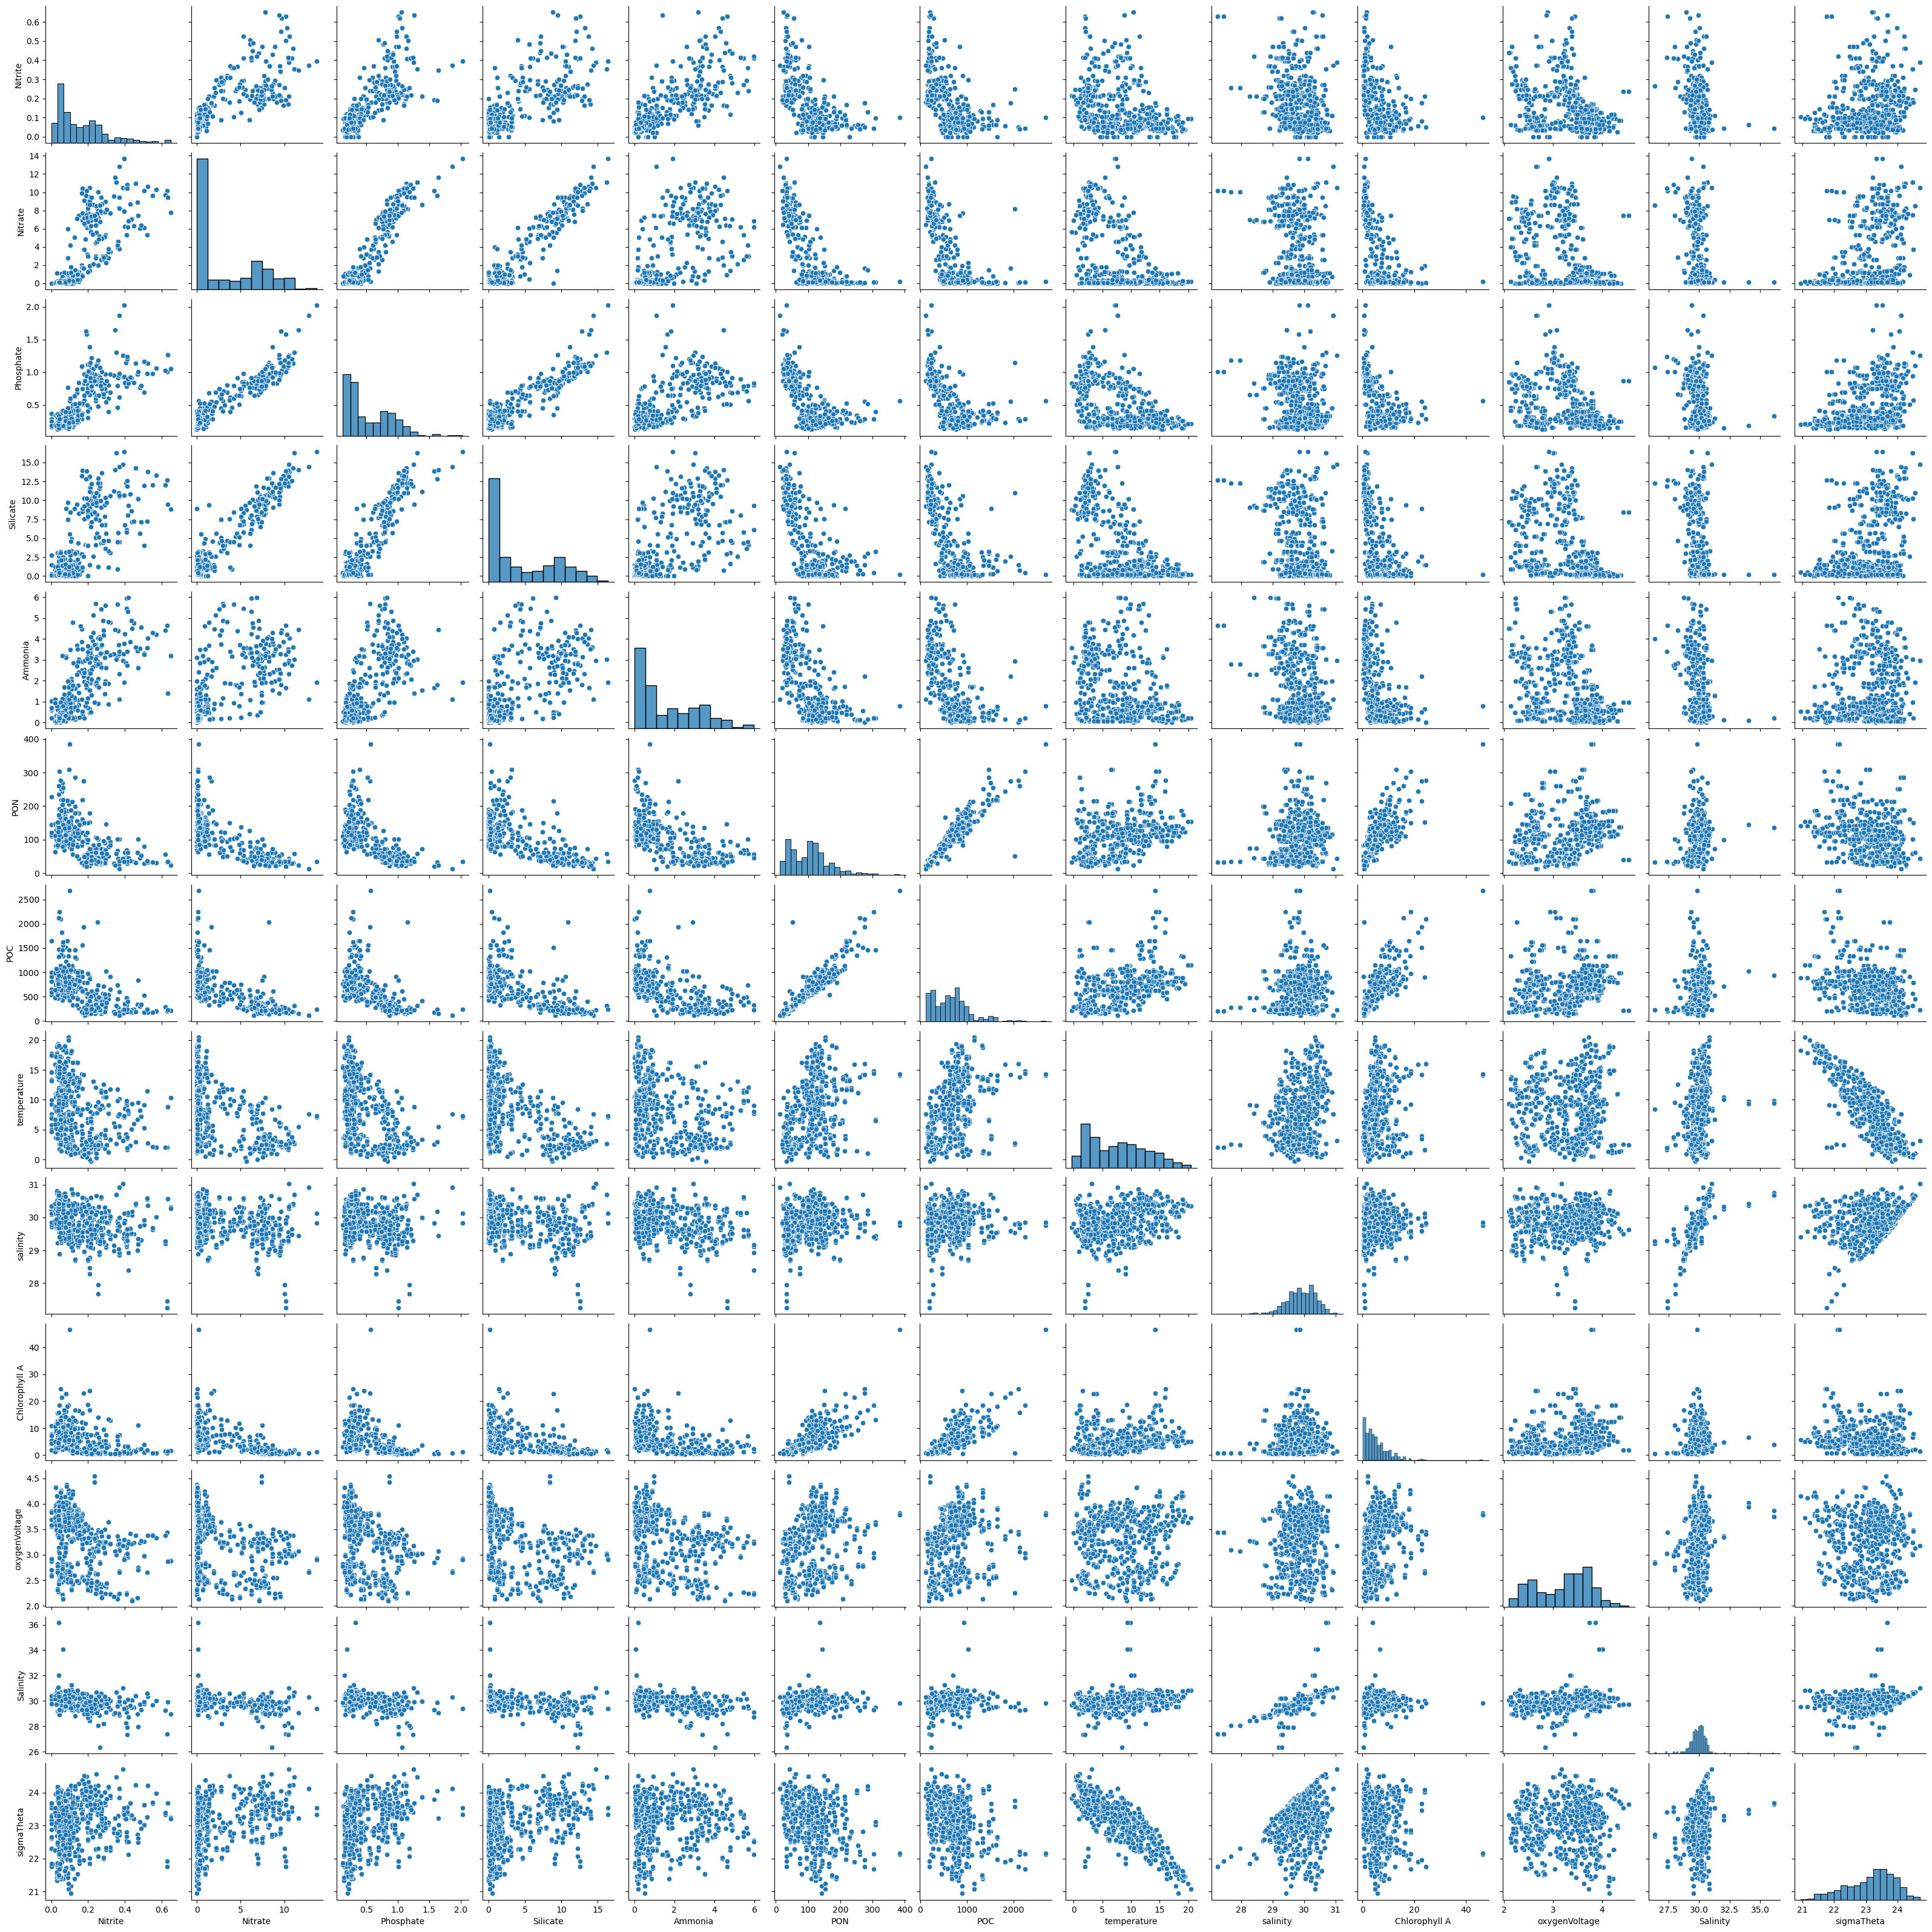

In [ ]:
correlation_pairplot(lab_md, selected_columns, 5)
#PON, POC correlated

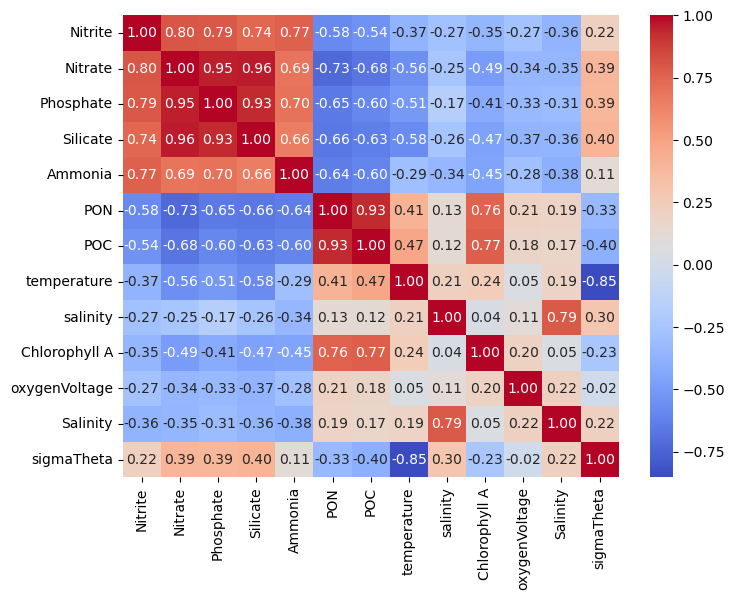

In [9]:
lab_md = pd.read_csv("/Users/Diana/Downloads/allmetadata_edit_Oct17_2024(allmetadata).csv")
selected_columns=['Nitrite', 'Nitrate', 'Phosphate', 'Silicate', 'Ammonia','PON', 'POC','temperature', 'salinity', 'Chlorophyll A', 'oxygenVoltage', 'Salinity', 'sigmaTheta']
pca_result, corr_matrix = pca_and_correlation_analysis(lab_md, selected_columns, n_components=3, plot=True, depth=5)

Nutrients are correlated (Nitrite, Nitrate, Phosphate, Silicate, Ammonia)

Look directly for community shifts:
- Plot alpha diversity over time
- Plot ordination plots
- Indicator species

#### Describe the temporal succession of the community to disturbances
Years: 2014-2022

#### Can we identify disturbances based off changes in the microbial community (i.e. does change in community = disturbance?)


#### Did the community change in response to disturbances?

How much time for the community to revert? (Disturbances in september 2019-2022)
Focus on which type of disturbances? precipitations
How do we define the scope?

#### Metadata __md__ is formatted. It contains 38 columns.
__md__ is the lab's metadata for sampling, extraction and sequencing. \
__dfo_md__ is BBMP remote sensing data (salinity, pH, temperature, density..) \
__bio_niskin__ is nutrient data \
Format __bio_niskin__ data to merge with __md__. __bio_niskin__ is 32 columns, including year, month, day, and depth. __dfo_md__ also has 32 columns, including year_time, month_time, day_time. To merge these data with __md__, we will change the time stamps columns to the same name, and generate a time_string column.

In [11]:
md = load_df()
#typo in names
md.replace({'BB18. 50AL': 'BB18.50AL',
            'BB18..16CL': 'BB18.16CL',
           'BB18.13.BS': 'BB18.13BS',
           'BB18.13.CL': 'BB18.13CL',
           'BB18.13CDS': 'BB18.13DS'}, inplace=True)
all_md = reformat_md(md)
df = consolidate_tables(year=all)
df['sample_name'] = df['sample_name'].replace({'\.0':'.'}, regex=True)
#some sample names included the lane number
df['nouveau']=df['sample_name'].str.split('.').str[:2].str.join('.')

/Users/Diana/Documents/escuela/phd/ch2/bb_data/2014/METADATA.txt
/Users/Diana/Documents/escuela/phd/ch2/bb_data/2022/METADATA.txt
/Users/Diana/Documents/escuela/phd/ch2/bb_data/2015/METADATA.txt
/Users/Diana/Documents/escuela/phd/ch2/bb_data/2017/METADATA.txt
/Users/Diana/Documents/escuela/phd/ch2/bb_data/2019/METADATA.txt
/Users/Diana/Documents/escuela/phd/ch2/bb_data/2021/METADATA.txt
/Users/Diana/Documents/escuela/phd/ch2/bb_data/2020/METADATA.txt
/Users/Diana/Documents/escuela/phd/ch2/bb_data/2018/METADATA.txt
/Users/Diana/Documents/escuela/phd/ch2/bb_data/2016/METADATA.txt


/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:557: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:558: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:562: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:571: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Found all yearly tables
Successfully saved all tables.


In [12]:
all_md = reformat_md(md)

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:557: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:558: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:562: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:571: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [13]:
tables = df[['nouveau', 'feature_id', 'feature_frequency']].copy()
tables.rename(columns={'nouveau':'sample_name'}, inplace=True)

all_md['sampleid'] = all_md['sampleid'].str.replace('_', '.')

problematique = ['BB17.28B', 'BB19.a35BS','BB19.a35CS', 'BB21.16AL', 'BB18.13.BS','BB18.13.CL', 'BB18.13CDS', 'BB18.45ALb', 'BB18.45ASb', 'BB18.45BLb', 'BB18.45BSb', 'BB18.45CLb', 'BB18.45CSb','BB18.45DLb', 'BB18.45DSb', 'BB16.12A', 'BB16.12B', 'BB16.12C','BB16.12D'] #anything after week 32 in year 2021 #weeks 12 to 37 are missing from 2020 #BB17 _ 28B is missing; no notes in the metadata file #BB19 a35BS and CS were accidently combined #no idea why BB21-16AL is missing #all the BB18 45__b were extracted by accident #BB16 week 12 no samples

In [14]:
merged = merge_metadata(tables, all_md)
separated = pick_metadata(merged)
newseparated = make_defract(all_md, separated)

Set up metadata ...
Saved merged_asvs_metadata.tsv
Appended all taxonomies to taxos
Saved separated by metadata dataframe.


/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:251: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:252: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:256: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [16]:
tiprob = separated[separated['feature_id'].isnull()]
tiprob['sampleid'].unique()

array(['BB22.1A', 'BB22.1B', 'BB22.1C', '-', 'BB22.1D', 'BB22.2A',
       'BB22.2B', 'BB22.2C', 'BB22.2E', 'BB22.2D', 'BB22.3A', 'BB22.3B',
       'BB22.3C', 'BB22.3E', 'BB22.3D', 'BB22.4A', 'BB22.4B', 'BB22.4C',
       'BB22.4E', 'BB22.4D', 'BB22.5A', 'BB22.5B', 'BB22.5C', 'BB22.5E',
       'BB22.5D', 'BB22.6A', 'BB22.6B', 'BB22.6C', 'BB22.6E', 'BB22.6D',
       'BB22.7A', 'BB22.7B', 'BB22.7C', 'BB22.7E', 'BB22.7D', 'BB22.8A',
       'BB22.8B', 'BB22.8C', 'BB22.8E', 'BB22.8D', 'BB22.9A', 'BB22.9B',
       'BB22.9C', 'BB22.9E', 'BB22.9D', 'BB22.10A', 'BB22.10B',
       'BB22.10C', 'BB22.10E', 'BB22.10D', 'BB22.11A', 'BB22.11B',
       'BB22.11C', 'BB22.11E', 'BB22.11D', 'BB22.12A', 'BB22.12B',
       'BB22.12C', 'BB22.12E', 'BB22.12D', 'BB22.13A', 'BB22.13B',
       'BB22.13C', 'BB22.13E', 'BB22.13D', 'BB22.14A', 'BB22.14B',
       'BB22.14C', 'BB22.14E', 'BB22.14D', 'BB22.15A', 'BB22.15B',
       'BB22.15C', 'BB22.15E', 'BB22.15D', 'BB22.16A', 'BB22.16B',
       'BB22.16C', 'BB22.16E'

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:592: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/Diana/Documents/escuela/phd/ch2/bedfordbasinTS/functions.py:594: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



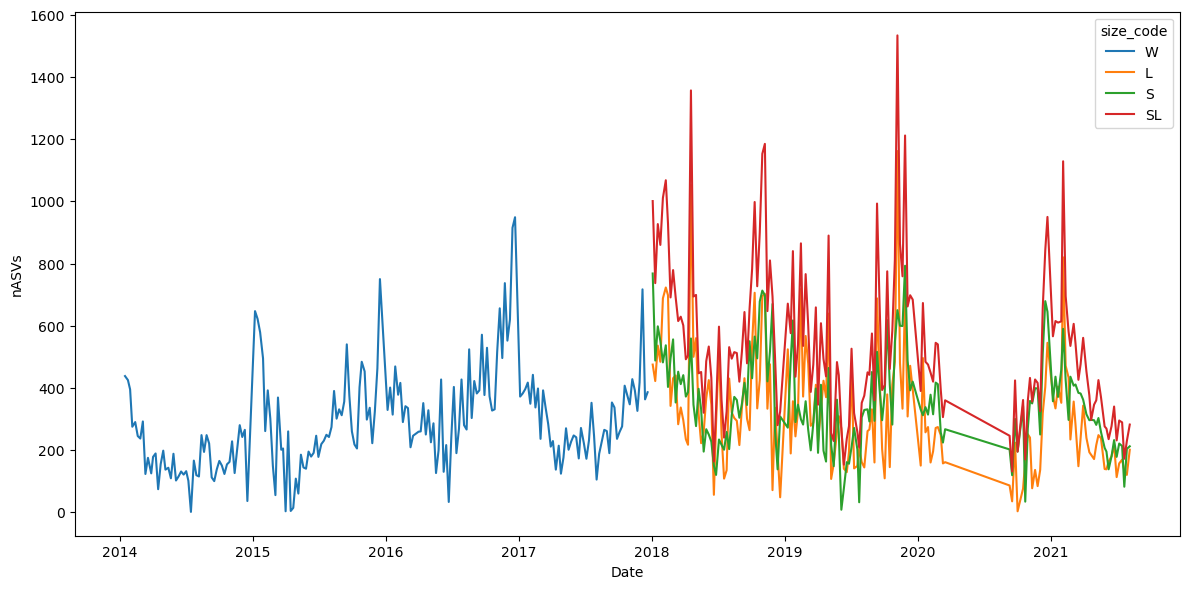

In [17]:
plot_adiv(newseparated, 1)

In [22]:
conda install ruptures

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1



## Package Plan ##

  environment location: /Users/Diana/mambaforge/envs/qiime2-2023.5

  added / updated specs:
    - ruptures


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       hecd8cb5_0         131 KB
    openssl-3.4.1              |       hc426f3f_0         2.5 MB  conda-forge
    ruptures-1.1.9             |   py38h63504b1_2         247 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW pac

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from statsmodels.tsa.seasonal import STL
import ruptures as rpt  # For change point detection

In [36]:
# --- Step 1: Compute Beta Diversity Between Consecutive Weeks ---
# Suppose `df` is your DataFrame and you have selected the community feature columns.
# Adjust 'feature_cols' to the ones that represent your community data.
newseparated = newseparated[newseparated['feature_frequency'] != 0]
df_wide = newseparated.pivot_table(index='sampleid', columns='feature_id', values='feature_frequency', fill_value=0)
# List your community feature columns here.
X = df_wide.values

# Compute the Bray-Curtis dissimilarity matrix (pairwise for all samples)
dissimilarity_matrix = squareform(pdist(X, metric='braycurtis'))

# Since samples are weekly, compute dissimilarity between consecutive samples.
# (Assuming the DataFrame is sorted by time.)
consecutive_dissimilarity = np.diag(dissimilarity_matrix, k=1)


In [35]:
mddd = newseparated[newseparated['feature_frequency'] != 0]
mddd = mddd[['sampleid', 'time_string_y']].drop_duplicates()
mddd

sampleid time_string_y
49060    BB22.5.0DSL    2019-01-30
49410    BB22.6.0DSL    2019-02-06
49813    BB22.nanASL    2019-07-03
50485    BB22.nanBSL    2019-07-03
51188    BB22.nanCSL    2019-07-03
...              ...           ...
1073563    BB21.50DS    2021-12-15
1073564   BB18.45ASb    2018-11-07
1073565   BB18.45BSb    2018-11-07
1073566   BB18.45CSb    2018-11-07
1073567   BB18.45DSb    2018-11-07

[2857 rows x 2 columns]

In [34]:
# Create a time series index based on your weekly samples.
time_series = pd.Series(consecutive_dissimilarity, index=mddd['time_string_y'][1:])

# --- Step 2: Decompose the Time Series to Remove Seasonality ---
# Use STL decomposition; the period here might be set to 52 if you expect yearly seasonality.
stl = STL(time_series, period=52, robust=True)
result = stl.fit()
residual = result.resid

# Plot the decomposition for inspection.
plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(312)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(313)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

# --- Step 3: Apply Change Point Detection on the Residuals ---
# Here, we use the PELT algorithm from the ruptures package.
algo = rpt.Pelt(model="l2").fit(residual.values)
# Choose a penalty value; you might need to adjust this based on your data.
penalty = 1.0
change_points = algo.predict(pen=penalty)

# Plot the residuals with detected change points.
plt.figure(figsize=(10, 4))
plt.plot(residual.index, residual, label='Residual')
for cp in change_points:
    if cp < len(residual):
        plt.axvline(x=residual.index[cp], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.xlabel('Time')
plt.ylabel('Residual Beta Diversity')
plt.legend()
plt.title('Detected Change Points in Community Dissimilarity')
plt.show()

ValueError: Length of values (2265) does not match length of index (3176)

In [17]:
data = newseparated[newseparated['year'] == 2019]
data = data[data['weekn'] >32]
data = data[data['weekn'] <45]

In [18]:
figs = taxbarplot_by_year(comm="mycomm", table=data, level="Family", depth=5, topn=15, include_other=False)

Find candidate events:
Determine the magnitude environmental shift
Duration:
Community level effect: (high, moderate, low)

What is our main question + subquestions?